# EDA on dataset - 2

In [1]:
#importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft,fftfreq
from sklearn.preprocessing import StandardScaler

In [2]:
#loading the dataset using pandas
x_train = pd.read_csv("../Dataset2/Train/Voltage_L1_train.csv")
y_train = pd.read_csv("../Dataset2/Train/output_train.csv")
x_test = pd.read_csv("../Dataset2/Test/Voltage_L1_test.csv")
y_test = pd.read_csv("../Dataset2/Test/output_test.csv")

In [3]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (5999, 256)
y_train (5999, 1)
x_test (3599, 256)
y_test (3599, 1)


## Data Preprocessing

This segment of notebook contains all the preprocessing steps which are performed on the data.

In [4]:
header =[]
for i in range(1,x_train.shape[1]+1):
    header.append("Col"+str(i))


In [5]:
x_train.columns = header
x_test.columns = header

In [6]:
header = ["output"]
y_train.columns = header
y_test.columns = header

In [7]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [8]:
X_train = np.zeros((x_train.shape[0],256))
X_test = np.zeros((x_test.shape[0],256))

for i in range(0,x_train.shape[0]):
    for j in range(0,256):
         X_train[i][j] = x_train[i][j]#+x_train[i][255-j]

for i in range(0,x_test.shape[0]):
    for j in range(0,256):
        X_test[i][j] = x_test[i][j]#+x_test[i][255-j]
    

In [9]:
print(X_train.shape)
X_train

(5999, 256)


array([[  573.65248593,  1003.34373648,  1588.40452538, ...,
        -1282.04202542,  -601.96821659,  -156.84836664],
       [ 4757.36518327,  5264.59891169,  5428.64248572, ...,
         3619.932691  ,  4008.28870092,  4422.22991059],
       [ 4242.14482442,  4644.67940194,  5013.35653196, ...,
         2776.87647883,  3248.63866156,  3807.66514927],
       ...,
       [ 1485.94779922,  2041.5379421 ,  2367.32480724, ...,
         -237.3423146 ,   556.56248086,   926.09925001],
       [ 4025.19475135,  4447.71331547,  4611.03018167, ...,
         2641.23922599,  3349.20935637,  3617.41815441],
       [ 2560.1815105 ,  2821.35568255,  3345.0992971 , ...,
          692.19105176,  1654.35127069,  1782.78233314]])

In [10]:
transform = StandardScaler()
X_norm = transform.fit_transform(X_train)

In [11]:
X_norm_fft = X_train.copy()
n = X_norm_fft.shape[0]
for i in range(0,x_train.shape[0]):
    X_norm_fft[i][:] = fft(X_train[i][:])
transform = StandardScaler()
X_norm_fft = transform.fit_transform(X_norm_fft)    

<ipython-input-11-555951a730bb>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  X_norm_fft[i][:] = fft(X_train[i][:])


class TYPE-1


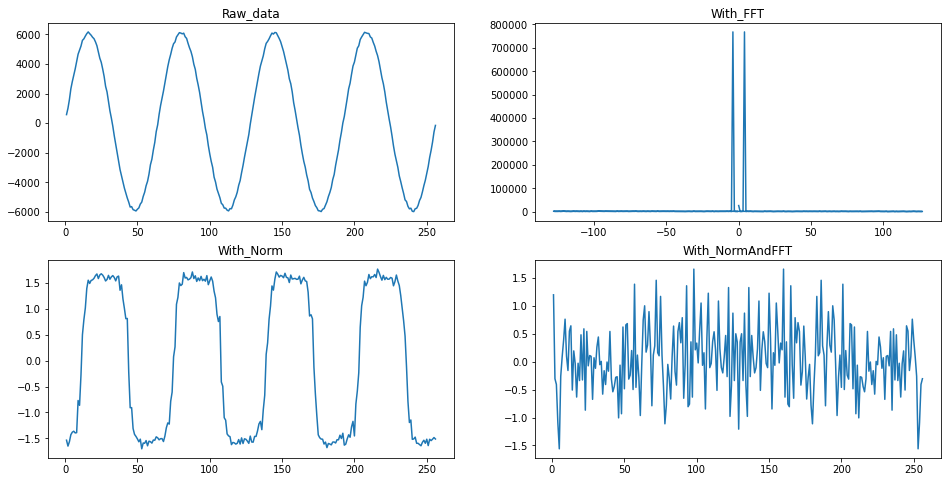

In [12]:
print("class", "TYPE-1")
fig, axes = plt.subplots(2, 2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,257)], X_train[0][0:256])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(X_train[0][0:256])
xf = fftfreq(256,1/256)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,257)], X_norm[0][0:256])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,257)], X_norm_fft[0][0:256])
axes[1][1].title.set_text('With_NormAndFFT')

class TYPE-2


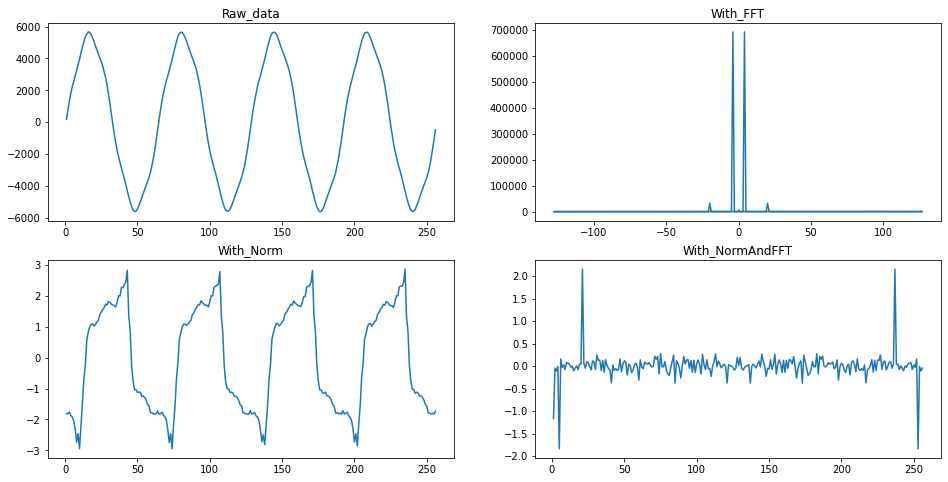

In [13]:
print("class", "TYPE-2")
fig, axes = plt.subplots(2, 2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,257)], X_train[1995][0:256])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(X_train[1995][0:256])
xf = fftfreq(256,1/256)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,257)], X_norm[1995][0:256])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,257)], X_norm_fft[1995][0:256])
axes[1][1].title.set_text('With_NormAndFFT')

class TYPE-3


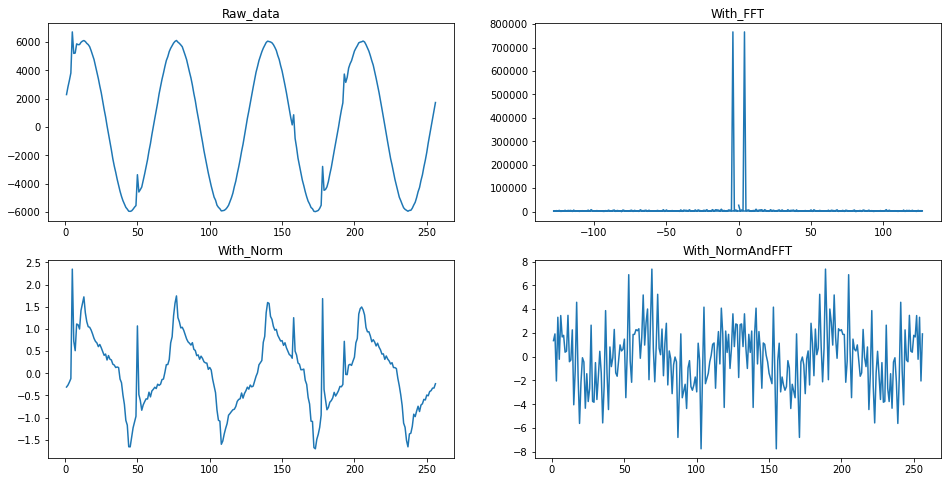

In [14]:
print("class", "TYPE-3")
fig, axes = plt.subplots(2, 2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,257)], X_train[1999][0:256])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(X_train[1999][0:256])
xf = fftfreq(256,1/256)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,257)], X_norm[1999][0:256])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,257)], X_norm_fft[1999][0:256])
axes[1][1].title.set_text('With_NormAndFFT')

class TYPE-4


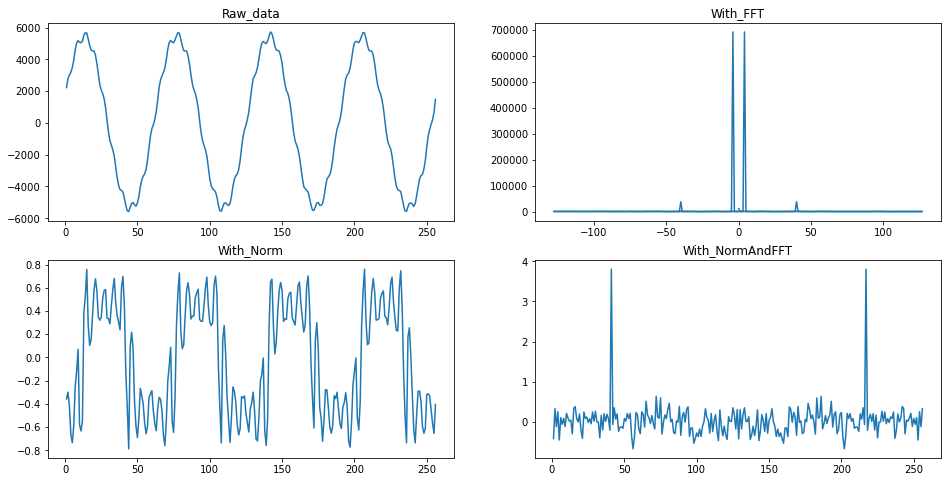

In [15]:
print("class", "TYPE-4")
fig, axes = plt.subplots(2, 2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,257)], X_train[3495][0:256])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(X_train[3495][0:256])
xf = fftfreq(256,1/256)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,257)], X_norm[3495][0:256])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,257)], X_norm_fft[3495][0:256])
axes[1][1].title.set_text('With_NormAndFFT')

class TYPE-5


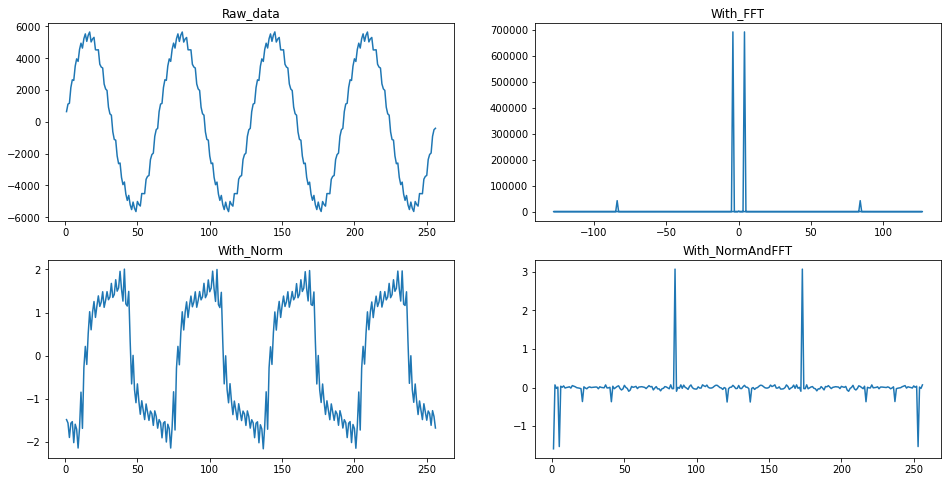

In [16]:
print("class", "TYPE-5")
fig, axes = plt.subplots(2, 2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,257)], X_train[4495][0:256])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(X_train[4495][0:256])
xf = fftfreq(256,1/256)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,257)], X_norm[4495][0:256])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,257)], X_norm_fft[4495][0:256])
axes[1][1].title.set_text('With_NormAndFFT')

class TYPE-6


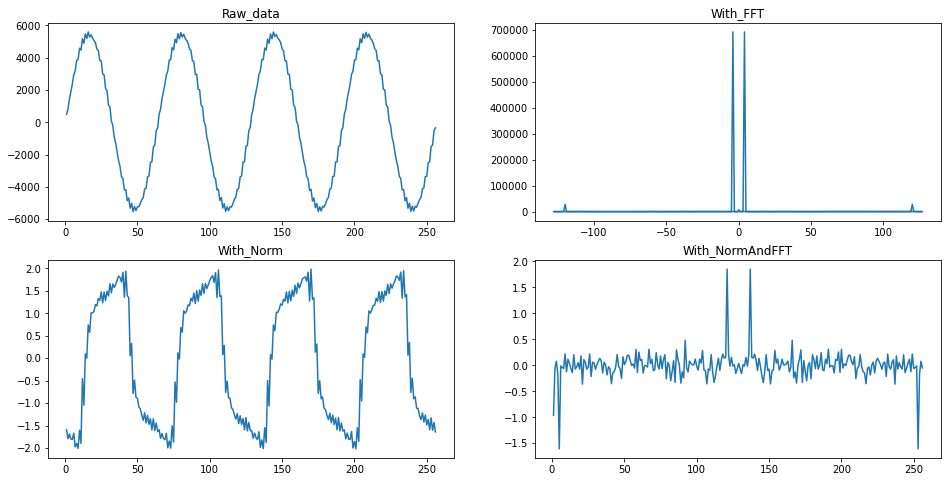

In [17]:
print("class", "TYPE-6")
fig, axes = plt.subplots(2, 2,figsize=(16,8))

#raw data
axes[0][0].plot([i for i in range(1,257)], X_train[5495][0:256])
axes[0][0].title.set_text('Raw_data')

#with fft
yf = fft(X_train[5495][0:256])
xf = fftfreq(256,1/256)
axes[0][1].plot(xf, np.abs(yf))
axes[0][1].title.set_text('With_FFT')

#after normalization
axes[1][0].plot([i for i in range(1,257)], X_norm[5495][0:256])
axes[1][0].title.set_text('With_Norm')

#with normalization and fft
axes[1][1].plot([i for i in range(1,257)], X_norm_fft[5495][0:256])
axes[1][1].title.set_text('With_NormAndFFT')